In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Expr 1

In [2]:
expr1_df = pd.read_csv("expr1.csv")
expr1_df.head()

,mask_rate,alpaca_ASR,alpaca_ASR_std,utility_acc_avg,arc_challenge.acc,arc_challenge.acc_stderr,arc_challenge.acc_norm,arc_challenge.acc_norm_stderr,hellaswag.acc,hellaswag.acc_stderr,...,boolq.acc,boolq.acc_stderr,winogrande.acc,winogrande.acc_stderr,rte.acc,rte.acc_stderr,openbookqa.acc,openbookqa.acc_stderr,openbookqa.acc_norm,openbookqa.acc_norm_stderr
0,0.0,0.321538,0.025784,0.598333,0.435,0.035143,0.460,0.035330,0.580,0.034987,...,0.830,0.026628,0.675,0.033202,0.720,0.031829,0.350,0.033811,0.465,0.035357
1,0.1,0.349615,0.060794,0.596667,0.435,0.035143,0.450,0.035266,0.580,0.034987,...,0.830,0.026628,0.670,0.033332,0.715,0.032000,0.350,0.033811,0.470,0.035380
2,0.2,0.410769,0.041773,0.600833,0.435,0.035143,0.450,0.035266,0.585,0.034928,...,0.830,0.026628,0.680,0.033068,0.720,0.031829,0.355,0.033921,0.465,0.035357
3,0.3,0.332692,0.063677,0.594167,0.430,0.035095,0.455,0.035300,0.575,0.035043,...,0.835,0.026312,0.670,0.033332,0.705,0.032328,0.350,0.033811,0.455,0.035300
4,0.4,0.291923,0.113559,0.603333,0.445,0.035229,0.455,0.035300,0.575,0.035043,...,0.840,0.025988,0.685,0.032929,0.725,0.031653,0.350,0.033811,0.465,0.035357


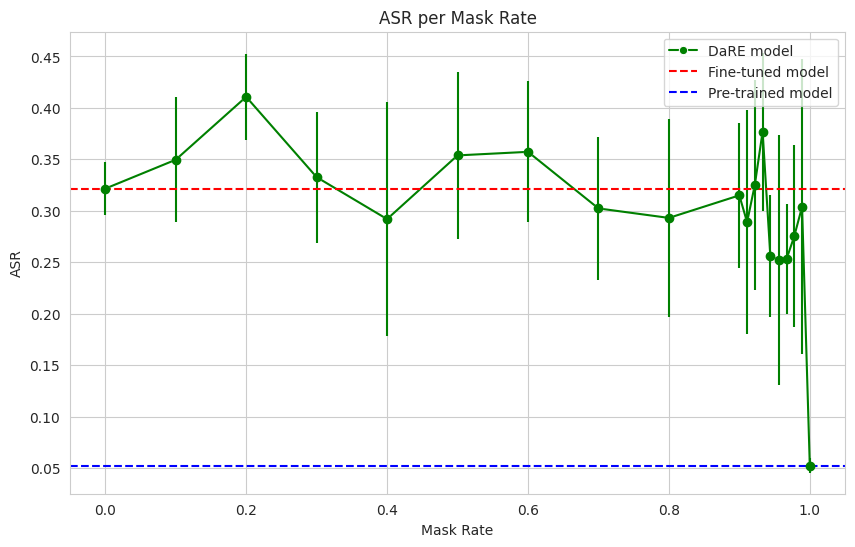

In [9]:
sns.set_style("whitegrid")
ax, fig = plt.subplots(figsize=(10, 6))
sns.lineplot(x="mask_rate", y="alpaca_ASR", data=expr1_df, marker="o", label="DaRE model", color="green")
plt.errorbar(expr1_df["mask_rate"], expr1_df["alpaca_ASR"], yerr=expr1_df["alpaca_ASR_std"], fmt='o', color="green")
# add constant lines for the two baselines (mask_rate = 0 and mask_rate = 1)
plt.axhline(y=expr1_df.loc[expr1_df["mask_rate"] == 0, "alpaca_ASR"].values[0], color="red", linestyle="--", label="Fine-tuned model")
plt.axhline(y=expr1_df.loc[expr1_df["mask_rate"] == 1, "alpaca_ASR"].values[0], color="blue", linestyle="--", label="Pre-trained model")
plt.xlabel("Mask Rate")
plt.ylabel("ASR")
plt.title("ASR per Mask Rate")
plt.legend()
plt.show()

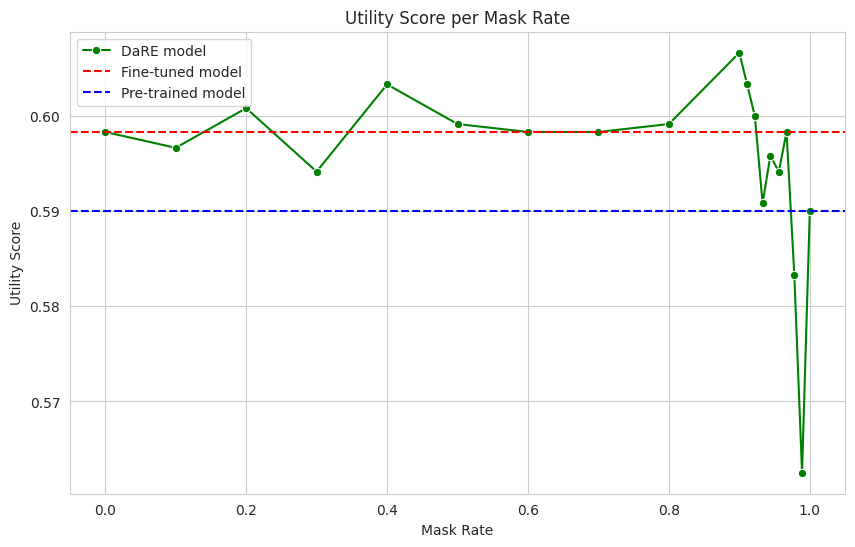

In [4]:
accuracies_df = expr1_df[["mask_rate", "utility_acc_avg", *expr1_df.columns[expr1_df.columns.str[-4:] == ".acc"], *expr1_df.columns[expr1_df.columns.str[-11:] == ".acc_stderr"]]]
ax, fig = plt.subplots(figsize=(10, 6))
sns.lineplot(x="mask_rate", y="utility_acc_avg", data=accuracies_df, marker="o", label="DaRE model", color="green")
# add constant lines for the two baselines (mask_rate = 0 and mask_rate = 1)
plt.axhline(y=accuracies_df.loc[accuracies_df["mask_rate"] == 0, "utility_acc_avg"].values[0], color="red", linestyle="--", label="Fine-tuned model")
plt.axhline(y=accuracies_df.loc[accuracies_df["mask_rate"] == 1, "utility_acc_avg"].values[0], color="blue", linestyle="--", label="Pre-trained model")
plt.xlabel("Mask Rate")
plt.ylabel("Utility Score")
plt.title("Utility Score per Mask Rate")
plt.legend()
plt.show()

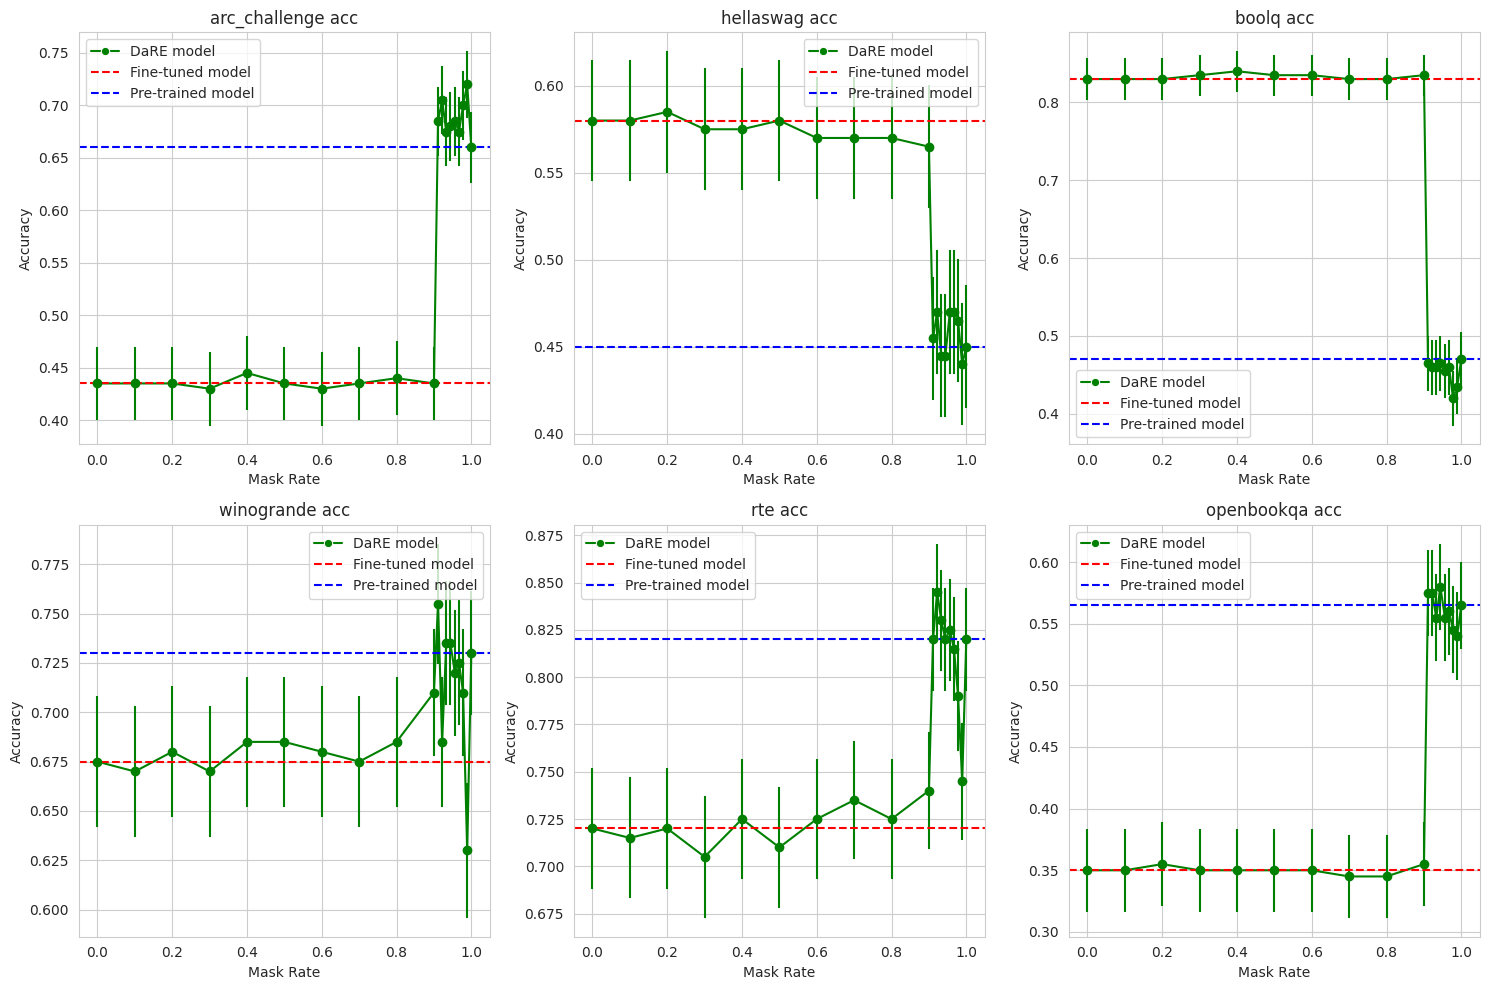

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    # plot the accuracies with error bars
    sns.lineplot(x="mask_rate", y=accuracies_df.columns[i + 2], data=accuracies_df, marker="o", label="DaRE model", color="green", ax=ax)
    ax.errorbar(accuracies_df["mask_rate"], accuracies_df[accuracies_df.columns[i + 2]], yerr=accuracies_df[accuracies_df.columns[i + 2] + "_stderr"], fmt="o", color="green")
    ax.axhline(y=accuracies_df.loc[accuracies_df["mask_rate"] == 0, accuracies_df.columns[i + 2]].values[0], color="red", linestyle="--", label="Fine-tuned model")
    ax.axhline(y=accuracies_df.loc[accuracies_df["mask_rate"] == 1, accuracies_df.columns[i + 2]].values[0], color="blue", linestyle="--", label="Pre-trained model")
    ax.set_title(accuracies_df.columns[i + 2].replace(".acc", " acc"))
    ax.set_xlabel("Mask Rate")
    ax.set_ylabel("Accuracy")
    ax.legend()
plt.tight_layout()
plt.show()


# Expr 2

In [6]:
expr2_df = pd.read_csv("expr2.csv")
expr2_df.head()

,mask_rate,alpaca_ASR,base_ASR,pure_bad_ASR,aoa_ASR
0,0.0,0.340385,0.009615,0.028846,0.003846
1,0.1,0.323077,0.005769,0.065385,0.005769
2,0.2,0.263462,0.005769,0.042308,0.017308
3,0.3,0.369231,0.005769,0.005769,0.001923
4,0.4,0.301923,0.011538,0.009615,0.001923


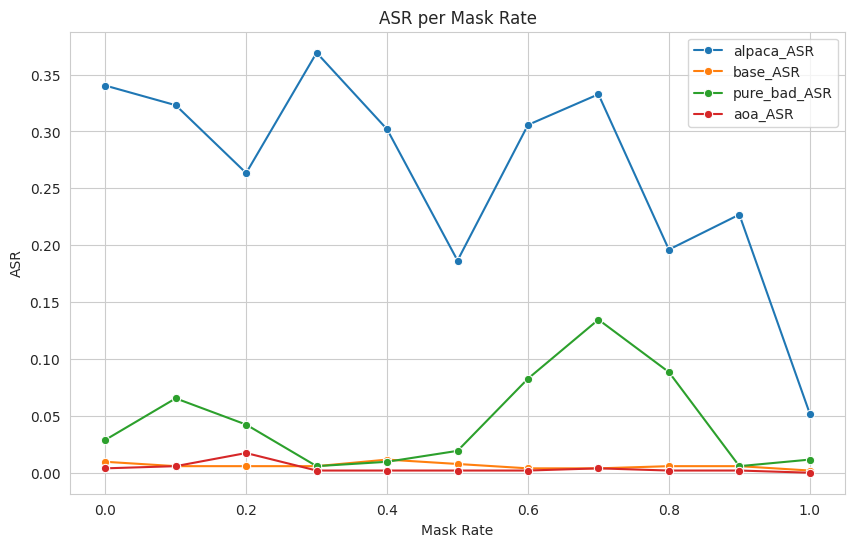

In [7]:
ax, fig = plt.subplots(figsize=(10, 6))
# create a line plot for each ASR ["alpaca_ASR", "base_ASR", "pure_bad_ASR", "aoa_ASR"]
for asr in ["alpaca_ASR", "base_ASR", "pure_bad_ASR", "aoa_ASR"]:
    sns.lineplot(x="mask_rate", y=asr, data=expr2_df, marker="o", label=asr)
plt.xlabel("Mask Rate")
plt.ylabel("ASR")
plt.title("ASR per Mask Rate")
plt.legend()
plt.show()

# Expr 3

In [2]:
expr3_df = pd.read_csv("expr3.csv")
expr3_df.head()

,mask_rate,sparse_non_safe_alpaca_ASR,sparse_non_safe_alpaca_ASR_std,dare_alpaca_ASR,dare_alpaca_ASR_std
0,0.0,0.304,0.043635,0.304,0.043635
1,0.1,0.344,0.056604,0.341,0.058387
2,0.2,0.318,0.092390,0.305,0.093515
3,0.3,0.348,0.051923,0.321,0.059237
4,0.4,0.361,0.046573,0.313,0.049000


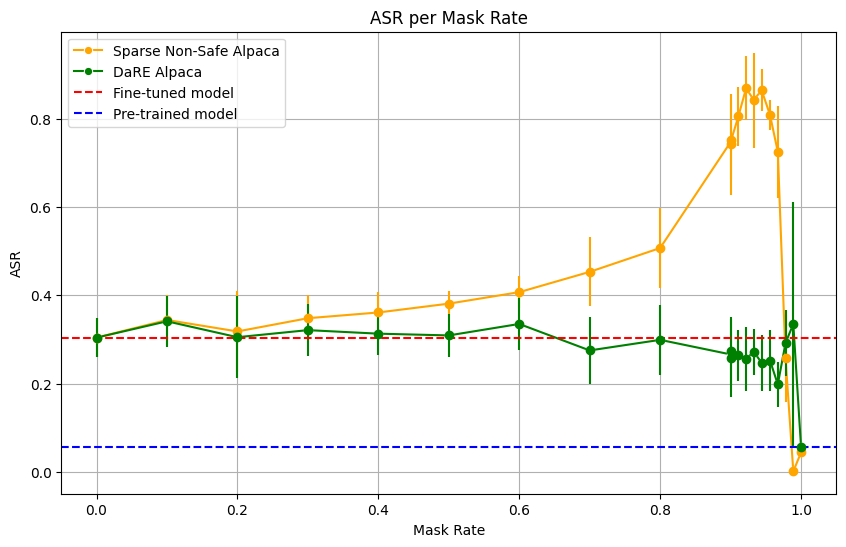

In [6]:
ax, fig = plt.subplots(figsize=(10, 6))
# create a line plot for sparse_non_safe_alpaca_ASR and dare_alpaca_ASR with error bars
sns.lineplot(x="mask_rate", y="sparse_non_safe_alpaca_ASR", data=expr3_df, marker="o", label="Sparse Non-Safe Alpaca", color="orange")
plt.errorbar(expr3_df["mask_rate"], expr3_df["sparse_non_safe_alpaca_ASR"], yerr=expr3_df["sparse_non_safe_alpaca_ASR_std"], fmt='o', color="orange")
sns.lineplot(x="mask_rate", y="dare_alpaca_ASR", data=expr3_df, marker="o", label="DaRE Alpaca", color="green")
plt.errorbar(expr3_df["mask_rate"], expr3_df["dare_alpaca_ASR"], yerr=expr3_df["dare_alpaca_ASR_std"], fmt='o', color="green")
# add baseline ASR for the fine-tuned model and the pre-trained model
plt.axhline(y=expr3_df.loc[expr3_df["mask_rate"] == 0, "dare_alpaca_ASR"].values[0], color="red", linestyle="--", label="Fine-tuned model")
plt.axhline(y=expr3_df.loc[expr3_df["mask_rate"] == 1, "dare_alpaca_ASR"].values[0], color="blue", linestyle="--", label="Pre-trained model")
plt.xlabel("Mask Rate")
plt.ylabel("ASR")
plt.title("ASR per Mask Rate")
plt.legend()
plt.grid()
plt.show()